# Dados IBGE 
## Santa Catarina 

In [9]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import csv

In [11]:
dadosSC = pd.read_csv("C:\\GESAD\\Inputs\\IBGE_SC.csv")
dadosSC.head()

,Município [-],Código [-],Gentílico [-],Prefeito [2021],Área Territorial - km² [2022],População residente - pessoas [2022],Densidade demográfica - hab/km² [2022],Escolarização <span>6 a 14 anos</span> - % [2010],IDHM <span>Índice de desenvolvimento humano municipal</span> [2010],Mortalidade infantil - óbitos por mil nascidos vivos [2022],Receitas realizadas - R$ (×1000) [2017],Despesas empenhadas - R$ (×1000) [2017],PIB per capita - R$ [2021]
0,Abdon Batista,4200051,abdonense,JADIR LUIZ DE SOUZA,237.517,2598,10.94,100,0.694,-,23228.89256,18399.70671,29646.51
1,Abelardo Luz,4200101,abelardense,NERCI SANTIN,953.992,17392,18.23,97.1,0.696,15.38,62978.76490,54531.83536,43621.44
2,Agrolândia,4200200,agrolandense,JOSÉ CONSTANTE,206.815,10990,53.14,97,0.725,6.99,31019.33416,28123.29815,35492.31
3,Agronômica,4200309,agronomense,CESAR LUIZ CUNHA,129.774,6055,46.66,94.4,0.741,-,20069.01248,17786.64890,41807.92
4,Água Doce,4200408,água-docense,NELCI FÁTIMA TRENTO BORTOLINI,1319.137,6508,4.93,97.9,0.698,11.63,36852.27110,29718.55841,90930.69


In [14]:
# Contingente populacional
populacao = pd.DataFrame()
populacao['Município'] = ()
populacao['Código'] = ()
populacao['0 a 10'] = ()
populacao['10 a 20'] = ()
populacao['20 a 50'] = ()
populacao['50 a 100'] = ()
populacao['100 a 500'] = ()
populacao['500+'] = ()

populacao['Município'] = (dadosSC['Município [-]'])
populacao['Código'] = (dadosSC['Código [-]'])

for i in range(len(dadosSC['População residente - pessoas [2022]'])):
    if 0<dadosSC['População residente - pessoas [2022]'][i]<10000:
        populacao.loc[i, '0 a 10'] = dadosSC['População residente - pessoas [2022]'][i]
    if 10000<dadosSC['População residente - pessoas [2022]'][i]<20000:
        populacao.loc[i, '10 a 20'] = dadosSC['População residente - pessoas [2022]'][i]
    if 20000<dadosSC['População residente - pessoas [2022]'][i]<50000:
        populacao.loc[i, '20 a 50'] = dadosSC['População residente - pessoas [2022]'][i]
    if 50000<dadosSC['População residente - pessoas [2022]'][i]<100000:
        populacao.loc[i, '50 a 100'] = dadosSC['População residente - pessoas [2022]'][i]
    if 100000<dadosSC['População residente - pessoas [2022]'][i]<500000:
        populacao.loc[i, '100 a 500'] = dadosSC['População residente - pessoas [2022]'][i]
    if dadosSC['População residente - pessoas [2022]'][i]>500000:
        populacao.loc[i, '500+'] = dadosSC['População residente - pessoas [2022]'][i]

populacao

,Município,Código,0 a 10,10 a 20,20 a 50,50 a 100,100 a 500,500+
0,Abdon Batista,4200051,2598.0,NaN,NaN,NaN,NaN,NaN
1,Abelardo Luz,4200101,NaN,17392.0,NaN,NaN,NaN,NaN
2,Agrolândia,4200200,NaN,10990.0,NaN,NaN,NaN,NaN
3,Agronômica,4200309,6055.0,NaN,NaN,NaN,NaN,NaN
4,Água Doce,4200408,6508.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
290,Xanxerê,4219507,NaN,NaN,NaN,51607.0,NaN,NaN
291,Xavantina,4219606,3653.0,NaN,NaN,NaN,NaN,NaN
292,Xaxim,4219705,NaN,NaN,31918.0,NaN,NaN,NaN
293,Zortéa,4219853,3930.0,NaN,NaN,NaN,NaN,NaN


In [15]:
# Quantidade de municípios em cada coluna
cols_numericas = populacao.select_dtypes(np.float64).columns
aux = np.sum(~np.isnan(populacao[cols_numericas]), axis=0)
titulos_colunas = populacao.columns.tolist()
titulos_colunas.pop(0)
titulos_colunas.pop(0)
aux

0 a 10       162
10 a 20       61
20 a 50       40
50 a 100      18
100 a 500     12
500+           2
dtype: int64

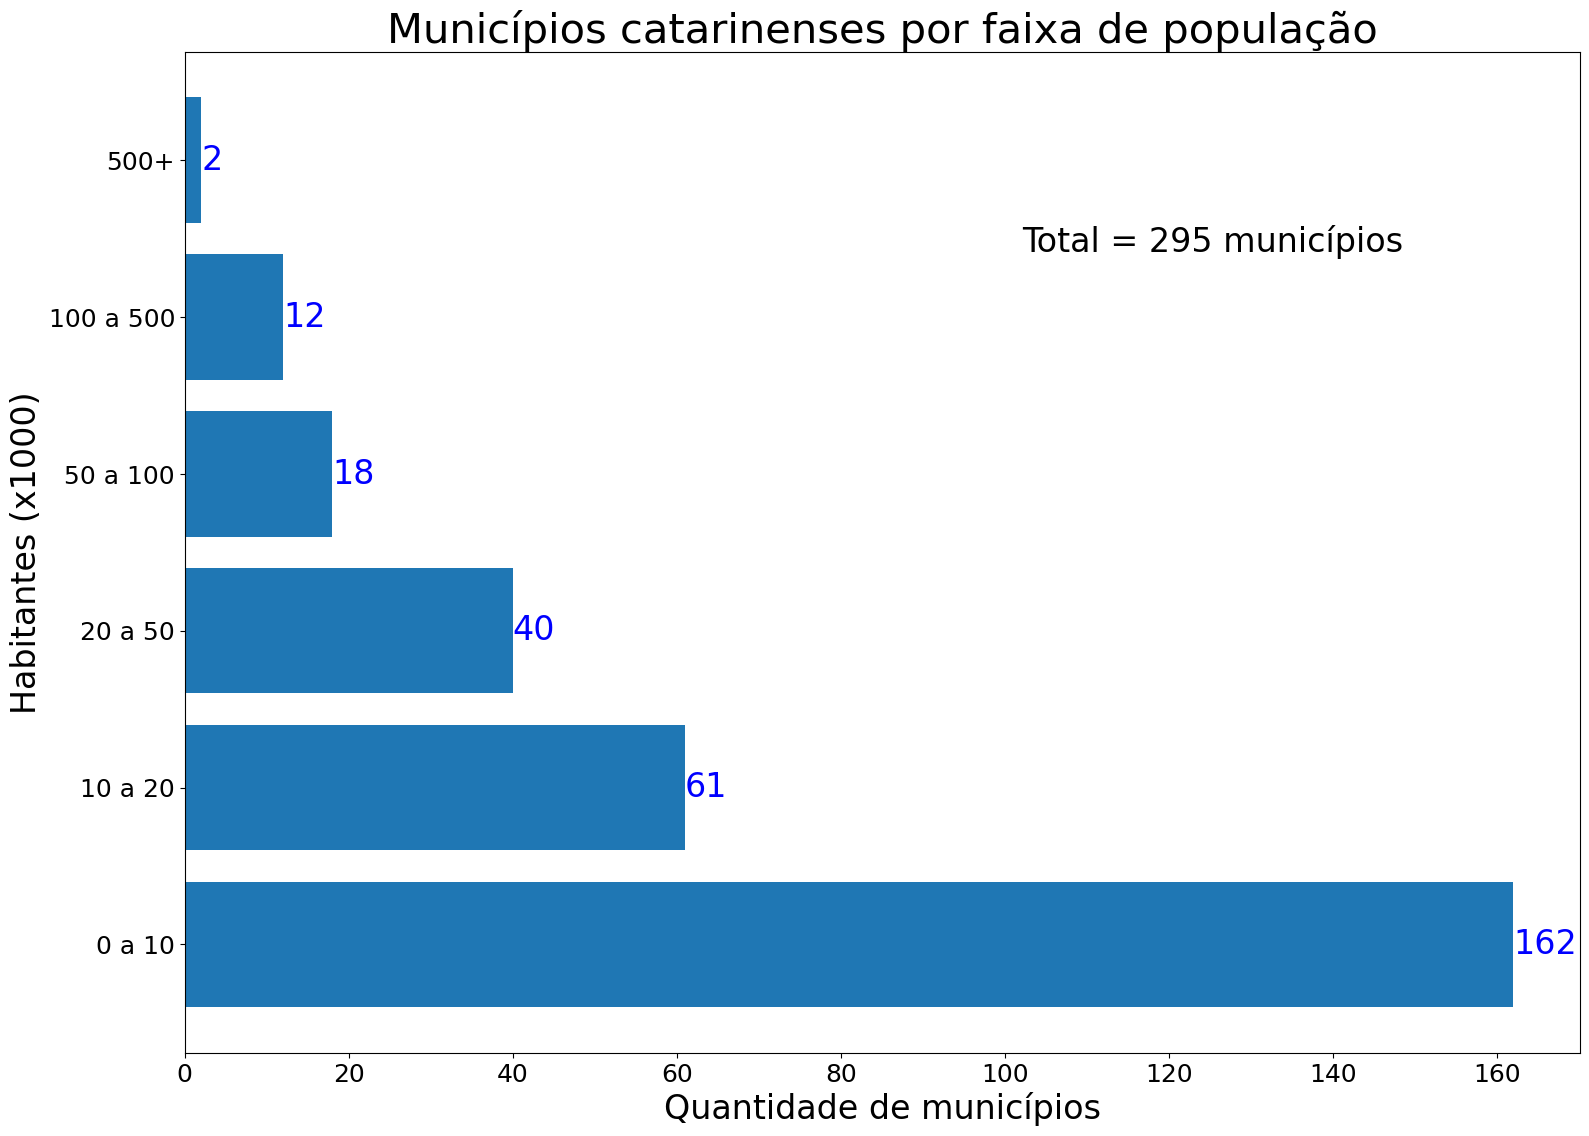

In [20]:
# Gráfico
fig, ax = plt.subplots(figsize=(18, 13))
ax.barh(titulos_colunas, aux) 
# Adicionando os valores no topo das barras
for i, v in enumerate(aux):
    ax.text(v, i, str(v), color='blue', va='center', fontsize=24)

plt.xlabel('Quantidade de municípios', fontsize=24)
plt.ylabel('Habitantes (x1000)', fontsize=24)
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.title('Municípios catarinenses por faixa de população', fontsize=30)
plt.text(0.6, 0.8, 'Total = 295 municípios', fontsize=24, transform=plt.gca().transAxes)
plt.savefig('SC.png')
plt.show() 

In [21]:
# Identificando os municípios que têm até 20 mil habitantes 
aux = np.isnan(populacao[cols_numericas])
cols = ('0 a 10', '10 a 20')
QtdMunicipios = 0
dicionario = {}
for j in range(len(cols)):
    for i in range(len(aux[cols[j]])):
        if aux[cols[j]][i]==False:
            dicionario[populacao['Código'][i]] = populacao[cols[j]][i] 
            QtdMunicipios = QtdMunicipios+1

print((QtdMunicipios/295)*100, '%')

# Salvar dicionário em arquivo csv
with open('dictSC.csv', 'w', newline='') as arquivo_csv:
    writer = csv.DictWriter(arquivo_csv, fieldnames=dicionario.keys())
    writer.writeheader()
    writer.writerow(dicionario)

75.59322033898304 %


In [22]:
pop10 = populacao['0 a 10'].sum()
pop20 = populacao['10 a 20'].sum()
total = dadosSC['População residente - pessoas [2022]'].sum()  
print(pop10, pop20, total)
print(((pop10+pop20)/total)*100, '%') 

759282.0 841949.0 7610361
21.040145138975667 %


In [23]:
dicionario

{4200051: 2598.0,
 4200309: 6055.0,
 4200408: 6508.0,
 4200507: 6036.0,
 4200556: 2839.0,
 4200606: 6743.0,
 4200754: 1856.0,
 4200804: 5943.0,
 4200903: 5358.0,
 4201000: 8285.0,
 4201109: 3593.0,
 4201257: 9811.0,
 4201273: 4378.0,
 4201505: 8834.0,
 4201604: 3556.0,
 4201653: 2510.0,
 4201703: 8319.0,
 4201802: 3227.0,
 4201901: 6780.0,
 4202081: 3144.0,
 4202099: 1668.0,
 4202131: 5872.0,
 4202156: 2658.0,
 4202438: 3515.0,
 4202503: 4026.0,
 4202537: 2777.0,
 4202578: 2187.0,
 4202602: 8418.0,
 4202701: 5363.0,
 4202859: 4026.0,
 4202875: 2489.0,
 4203105: 6304.0,
 4203154: 3443.0,
 4203253: 2625.0,
 4203402: 7257.0,
 4203501: 9623.0,
 4204103: 4614.0,
 4204152: 2805.0,
 4204178: 3317.0,
 4204194: 2950.0,
 4204350: 4781.0,
 4204459: 2065.0,
 4204756: 1968.0,
 4204905: 8530.0,
 4205100: 4221.0,
 4205159: 3637.0,
 4205175: 3402.0,
 4205191: 2269.0,
 4205209: 4885.0,
 4205357: 1783.0,
 4205431: 2682.0,
 4205555: 2411.0,
 4205605: 3210.0,
 4206108: 6277.0,
 4206603: 4829.0,
 4206652: 